(공통)문제 1.
이미지 분류 모델을 만들고,전체 코드와 분류 결과를 주피터 노트북 파일로 자신의 깃헙에 제출합니다. (3점)

    - 이미지 데이터를 적절히 전처리 한 후 데이터 파이프라인을 설계합니다.

    - 모델은 VGG-16, VGG-19, ResNet-34, ResNet-50, GoogLeNet 등 케창딥 교재에 소개 된 CNN 모델 중 하나를 선택합니다.

    - 텐서플로우 라이브러리에서 모델을 불러오지 않고, 직접 모델 학습 코드를 짜야 합니다.

    - Data augmentation 등 케창딥에서 배운 모든 방법을 사용해 최고 기록을 달성해보세요.

! unzip -q ./archive.zip

In [1]:
### 이미지 데이터를 적절히 전처리 한 후 데이터 파이프라인을 설계합니다.

In [2]:
import os, numpy as np
import matplotlib.pyplot as plt

In [3]:

#train_path_normal = home_path+"/aiffel/workspace/케창딥/Main_Quest_2/chest_xray/train/NORMAL/"
train_dir = "./chest_xray/train"
val_dir = "./chest_xray/val"
test_dir = "./chest_xray/test"

num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))

pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"


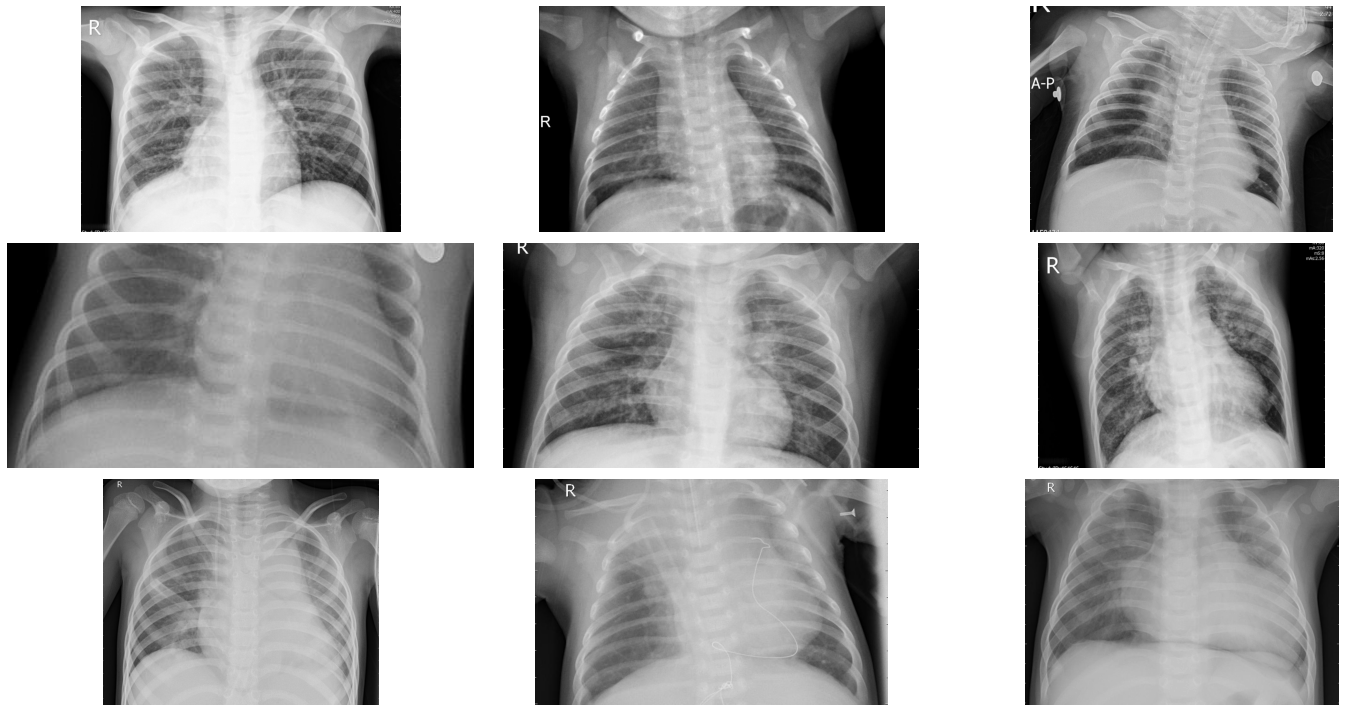

In [4]:
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

## VGG16

In [5]:
from keras.layers import GlobalAveragePooling2D
import tensorflow as tf

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [7]:
train_dataset = image_generator.flow_from_directory(train_dir, 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation_dataset = image_generator.flow_from_directory(val_dir, 
                                                batch_size=16
                                                 , 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test_dataset = image_generator.flow_from_directory(test_dir, 
                                            batch_size=32, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


from tensorflow.keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),
                                   include_top=False,weights='imagenet')

inception_base_model.trainavle = False

In [8]:
from tensorflow import keras
#from keras.models import Sequential, Model
from keras.models import Sequential

from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = keras.Sequential(
    [
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.2)
    ]
)

In [9]:

from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

model = Sequential([
        data_augmentation,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint('vgg16.h5',save_best_only=True),
    keras.callbacks.TensorBoard(log_dir='logs')]

In [11]:
history = model.fit(
    train_dataset,
    epochs=18,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/18
163/163 [==============================] - 220s 1s/step - loss: 0.7251 - accuracy: 0.5941 - precision: 0.7427 - recall: 0.6942 - val_loss: 0.7982 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/18
163/163 [==============================] - 85s 519ms/step - loss: 0.6268 - accuracy: 0.6965 - precision: 0.7412 - recall: 0.9089 - val_loss: 0.8393 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/18
163/163 [==============================] - 84s 516ms/step - loss: 0.5998 - accuracy: 0.7293 - precision: 0.7420 - recall: 0.9745 - val_loss: 0.8215 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/18
163/163 [==============================] - 84s 517ms/step - loss: 0.5908 - accuracy: 0.7362 - precision: 0.7426 - recall: 0.9871 - val_loss: 0.8118 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 6/18
163/163 [==============================] - 84s 516ms/step - loss: 0.5826 - accuracy

Text(0.5, 1.0, 'Accuracy Evolution')

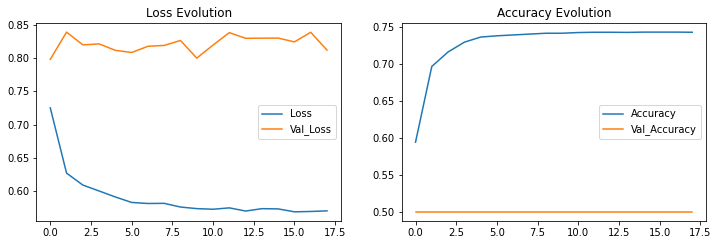

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')